# Experiment Results
This experiment was performed using the best parameters that maximized f1-macro.  

Use results from `notebooks/cometML/f1macro_results_v6` directory.(result from cometML project `handai-gencat-6`)  
We will visualize the following two experiments.

* Scalability Experiment
    * Edge Experiment
    * Node & Edge Experiment       

Note that the results of the node & edge experiment were obtained when the parameters were adjusted only for `GenCAT_cora_*_*_0` dataset.


In [9]:
import os
import sys
import datetime
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sys.path.append("../../")

path_result = "../cometML/f1macro_results_v6/"


In [10]:
from scripts.utils import load_data
from scripts.utils_gencat import  feature_extraction

In [11]:

def plot_result(dataframe, methods, x_list, base_dataset, labels: list , metric="test_acc"):
  plt.rcParams['text.usetex'] = True
  plt.style.use('default')
  sns.set()
  sns.set_style('whitegrid')
  sns.set_palette('Set1')

  fig = plt.figure(figsize=(8, 5))
  ax = fig.add_subplot(1, 1, 1)
  markers = ['o', 'v', 'x', 'D',".", "^", "<", ">", "p", "*"]
  markers = markers + markers
  colors = plt.cm.get_cmap("tab20").colors

  for i, method in enumerate(methods):
    tmp = dataframe[dataframe["net"] == method]
    # tmp = tmp[tmp["dataset"]==f"GenCAT_cora_{x[i]}_0"]
    # 集約→datasetのiter部分を集計 GenCAT_{dataset}_{para}_{iter}
    # print(method,tmp.shape)
    test_acc_mean_list, test_acc_std_list = [],[]
    for x in x_list:
      tmp_filtered = tmp[tmp["dataset"].str.contains(f"GenCAT_{base_dataset}_{x}")]
      if len(tmp_filtered)>0:
        test_acc_mean = (tmp_filtered[f"{metric}_mean"] *
            tmp_filtered["RPMAX"].astype(int)).sum() / (len(tmp_filtered) * tmp_filtered.head(1)["RPMAX"].astype(int).values[0])
        test_acc_std = (tmp_filtered[f"{metric}_std"] *
                    tmp_filtered["RPMAX"].astype(int)).sum() / (len(tmp_filtered) * tmp_filtered.head(1)["RPMAX"].astype(int).values[0])
      else:
        test_acc_mean = np.nan
        test_acc_std = np.nan
      test_acc_mean_list.append(test_acc_mean)
      test_acc_std_list.append(test_acc_std)
    # print(method, test_acc_std_list)
    ax.errorbar(
        x_list,
        test_acc_mean_list,
        yerr=test_acc_std_list,
        marker=markers[i],
        label=method,
        capthick=1,
        capsize=8,
        lw=1,
        color=colors[i])
  ax.set_xlabel(labels[0])
  ax.set_ylabel(labels[1])
  ax.legend(ncol=1, bbox_to_anchor=(1.05, 1), loc='upper left')
  plt.show()


# Scalability Experiment

## Edge Experiment
change number of edges

In [8]:
# filtering
exp = "scalability_edge"
split = "supervised"
result_path = f"{path_result}result_{exp}_{split}6.csv"

df_scalability_edge = pd.read_csv(result_path)
print(df_scalability_edge.shape)
df_scalability_edge.head()[["dataset", "net", "test_acc_mean",
                                 "test_acc_std", "date", "total_time_mean"]]


(204, 63)


,dataset,net,test_acc_mean,test_acc_std,date,total_time_mean
0,GenCAT_cora_20000_2,GCN,90.918978,0.335205,2022-06-08 11:31:10.803,1.360289
1,GenCAT_cora_20000_1,GCN,91.969197,1.251904,2022-06-08 11:30:52.618,1.345657
2,GenCAT_cora_20000_0,GCN,88.531618,1.672507,2022-06-08 11:30:34.462,1.355128
3,GenCAT_cora_15000_2,GCN,92.377885,2.055200,2022-06-08 11:29:57.593,7.208639
4,GenCAT_cora_15000_1,GCN,86.580784,1.070850,2022-06-08 11:29:20.776,7.410921


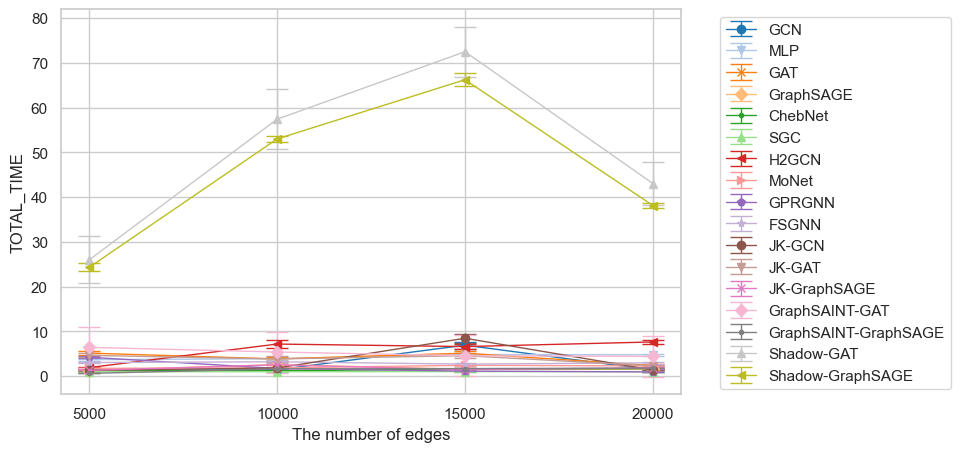

In [12]:
methods = ["GCN", "MLP", "GAT", "GraphSAGE", "ChebNet", "SGC", "H2GCN",
           "MoNet", "GPRGNN", "FSGNN", "JK-GCN", "JK-GAT", "JK-GraphSAGE",
           "GraphSAINT-GAT", "GraphSAINT-GraphSAGE", "Shadow-GAT", "Shadow-GraphSAGE"]
base_dataset = "cora"
metric = "total_time"
# ylabel = 'Accuracy (node classfication)'
ylabel = metric.upper()
xlabel = "The number of edges"

# x_list = 5000 * (2**np.array(range(8)))  # change edge
x_list = [5000, 10000, 15000, 20000]
x_list = [str(x) for x in x_list]

plot_result(
    df_scalability_edge,
    methods,
    x_list,
    base_dataset,
    labels=[
        xlabel,
        ylabel],
    metric=metric)


## Node & Edge Experiment
change number of nodes and edges

In [4]:
exp = "scalability_node_edge"
split = "supervised"
result_path = f"{path_result}result_{exp}_{split}6.csv"

df_scalability_node_edge = pd.read_csv(result_path)
print(df_scalability_node_edge.shape)
df_scalability_node_edge.head()[["dataset", "net", "test_acc_mean", "test_acc_std", "date", "total_time_mean"]]


(204, 63)


,dataset,net,test_acc_mean,test_acc_std,date,total_time_mean
0,GenCAT_cora_9000_15000_2,GCN,87.628524,1.115681,2022-06-07 14:08:55.563,1.860678
1,GenCAT_cora_9000_15000_1,GCN,87.317621,0.743436,2022-06-07 14:08:35.262,1.869858
2,GenCAT_cora_9000_15000_0,GCN,88.226601,0.106416,2022-06-07 14:08:15.114,1.815101
3,GenCAT_cora_12000_20000_2,GCN,90.319361,0.575207,2022-06-06 22:20:57.843,1.929149
4,GenCAT_cora_12000_20000_1,GCN,88.876348,0.447619,2022-06-06 22:20:37.603,2.063515


[('3000', '5000'), ('6000', '10000'), ('9000', '15000'), ('12000', '20000')]


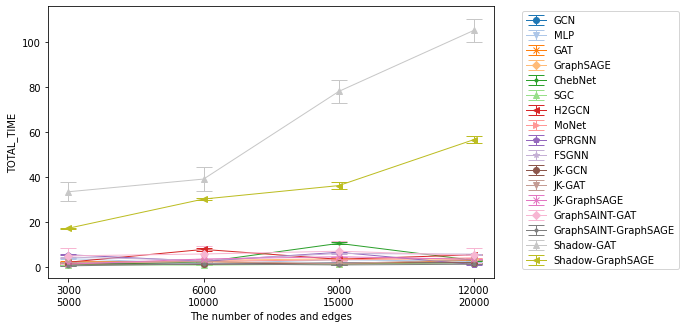

In [6]:
methods = ["GCN", "MLP", "GAT", "GraphSAGE", "ChebNet", "SGC", "H2GCN",
           "MoNet", "GPRGNN", "FSGNN", "JK-GCN", "JK-GAT", "JK-GraphSAGE",
           "GraphSAINT-GAT", "GraphSAINT-GraphSAGE", "Shadow-GAT", "Shadow-GraphSAGE"]
           
base_dataset = "cora"
metric = "total_time"
# ylabel = 'Accuracy (node classfication)'
ylabel = metric.upper()
xlabel = "The number of nodes and edges"
dataframe = df_scalability_node_edge

# edge_list = 5000 * (2**np.array(range(8)))  # change edge
edge_list =[5000, 10000, 15000, 20000]
edge_list = [str(x) for x in edge_list]

# node_list = 3000 * (2**np.array(range(8)))
node_list = [3000, 6000, 9000, 12000]
node_list = [str(x) for x in node_list]
x_list = list(zip(node_list,edge_list))
print(x_list)
fig = plt.figure(figsize=(8, 5))
ax = fig.add_subplot(1, 1, 1)
markers = ['o', 'v', 'x', 'D', ".", "^", "<", ">", "p", "*"]
markers = markers+markers
colors = plt.cm.get_cmap("tab20").colors

for i, method in enumerate(methods):
  tmp = dataframe[dataframe["net"] == method]
  # tmp = tmp[tmp["dataset"]==f"GenCAT_cora_{x[i]}_0"]
  # 集約→datasetのiter部分を集計 GenCAT_{dataset}_{para}_{iter}
  # print(method,tmp.shape)
  test_acc_mean_list, test_acc_std_list = [],[]
  for x in x_list:
    tmp_filtered = tmp[tmp["dataset"].str.contains(f"GenCAT_{base_dataset}_{x[0]}_{x[1]}")]
    if len(tmp_filtered)>0:
      test_acc_mean = (tmp_filtered[f"{metric}_mean"] *
          tmp_filtered["RPMAX"].astype(int)).sum() / (len(tmp_filtered) * tmp_filtered.head(1)["RPMAX"].astype(int).values[0])
      test_acc_std = (tmp_filtered[f"{metric}_std"] *
                  tmp_filtered["RPMAX"].astype(int)).sum() / (len(tmp_filtered) * tmp_filtered.head(1)["RPMAX"].astype(int).values[0])
      if test_acc_mean==0:
        test_acc_mean = np.nan
    else:
      test_acc_mean = np.nan
      test_acc_std = np.nan
    test_acc_mean_list.append(test_acc_mean)
    test_acc_std_list.append(test_acc_std)
  # print(method, test_acc_mean_list, test_acc_std_list)
  x_list_ = [f"{x_[0]}\n{x_[1]}" for x_ in x_list]
  ax.errorbar(
      x_list_,
      test_acc_mean_list,
      yerr=test_acc_std_list,
      marker=markers[i],
      label=method,
      capthick=1,
      capsize=8,
      lw=1,
      color=colors[i])

ax.set_xlabel(xlabel)
ax.set_ylabel(ylabel)
ax.legend(ncol=1, bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


In [13]:
# df_scalability_node_edge.query("net=='GPRGNN'")[["dataset", "net", "test_acc_mean",
#                                  "test_acc_std", "date", "total_time_mean", "epoch_time_mean", "epoch_mean"]]
